In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
featurs=['sex', 'smoker', 'region']

In [8]:
df.drop_duplicates(inplace=True)

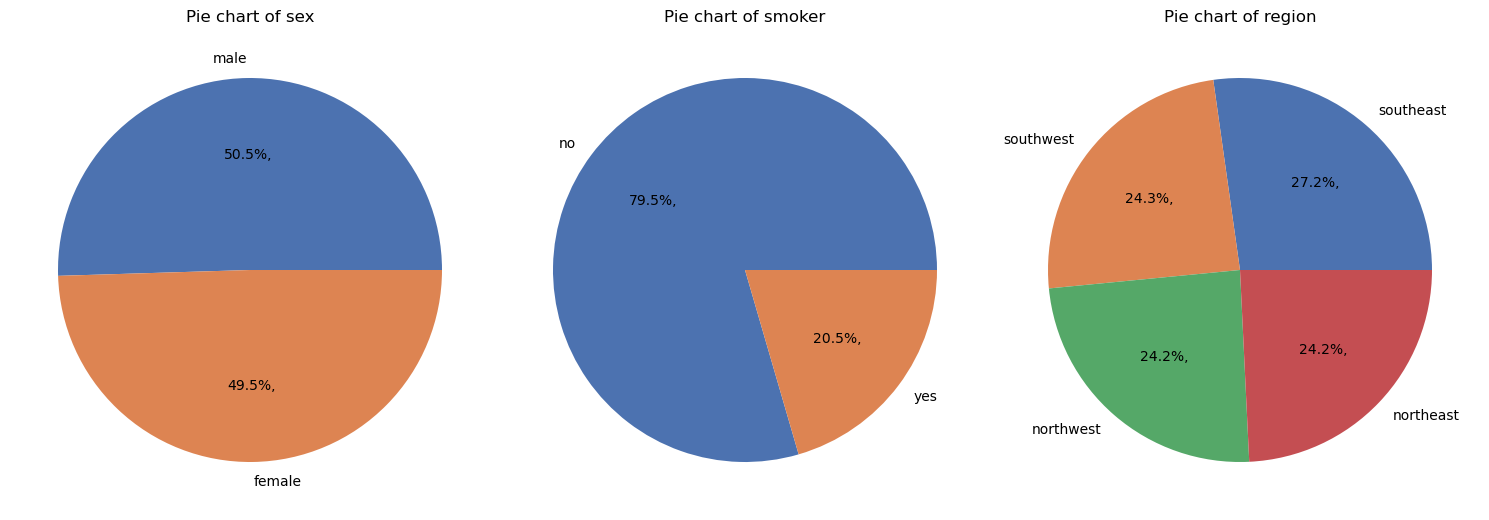

In [9]:
plt.subplots(figsize=(15,7))
for i,col in enumerate(featurs):
    colour=sns.color_palette('deep')
    plt.subplot(1,3,i+1)
    x=df[col].value_counts()
    plt.pie(x.values,
           labels=x.index,colors=colour,
            autopct='%1.1f%%,')
    plt.title('Pie chart of '+col)
    plt.tight_layout()
plt.show()

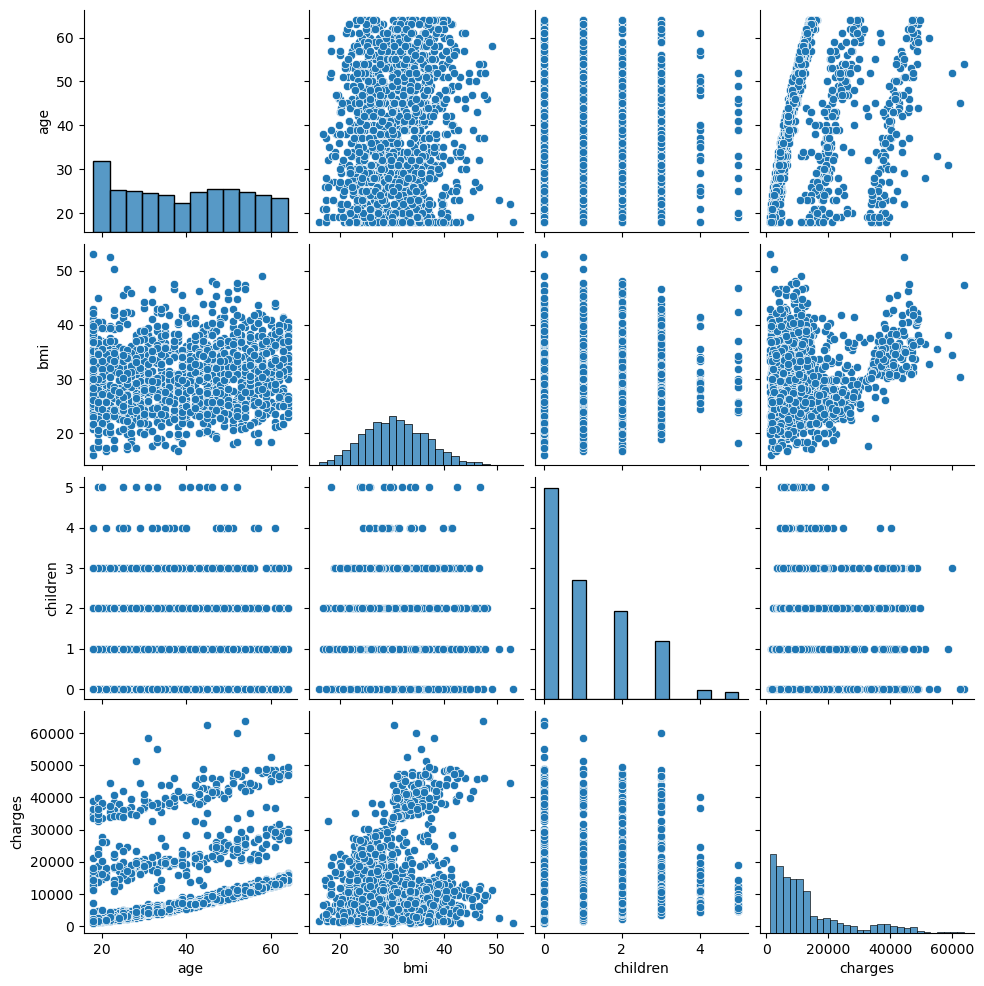

In [10]:
sns.pairplot(df)

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

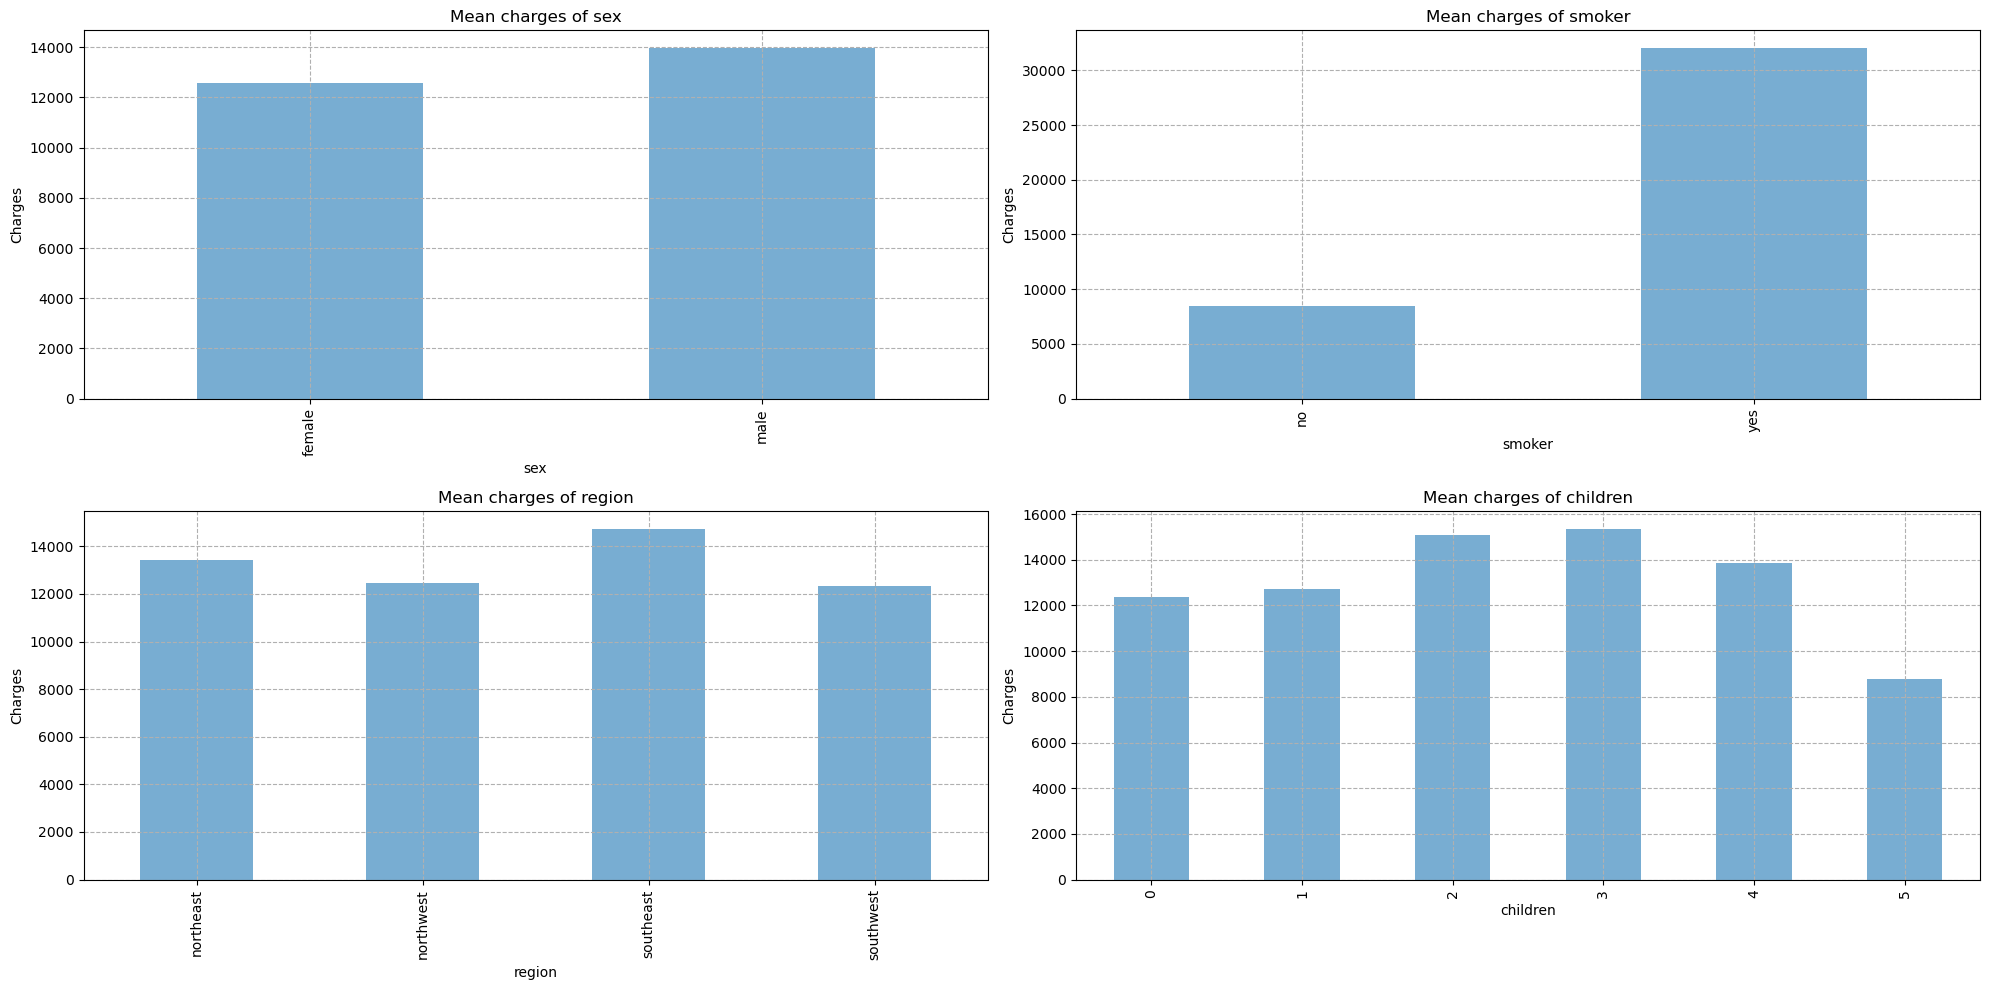

In [12]:
feature1=['sex','smoker','region','children']
plt.subplots(figsize=(20,10))
for i,col in enumerate(feature1):
    plt.subplot(2,2,i+1)
    df.groupby(col)['charges'].mean().plot(kind='bar',alpha=.6)
    plt.title('Mean charges of '+col)
    plt.ylabel('Charges')
    plt.tight_layout()
    plt.grid(ls='--')
plt.show()

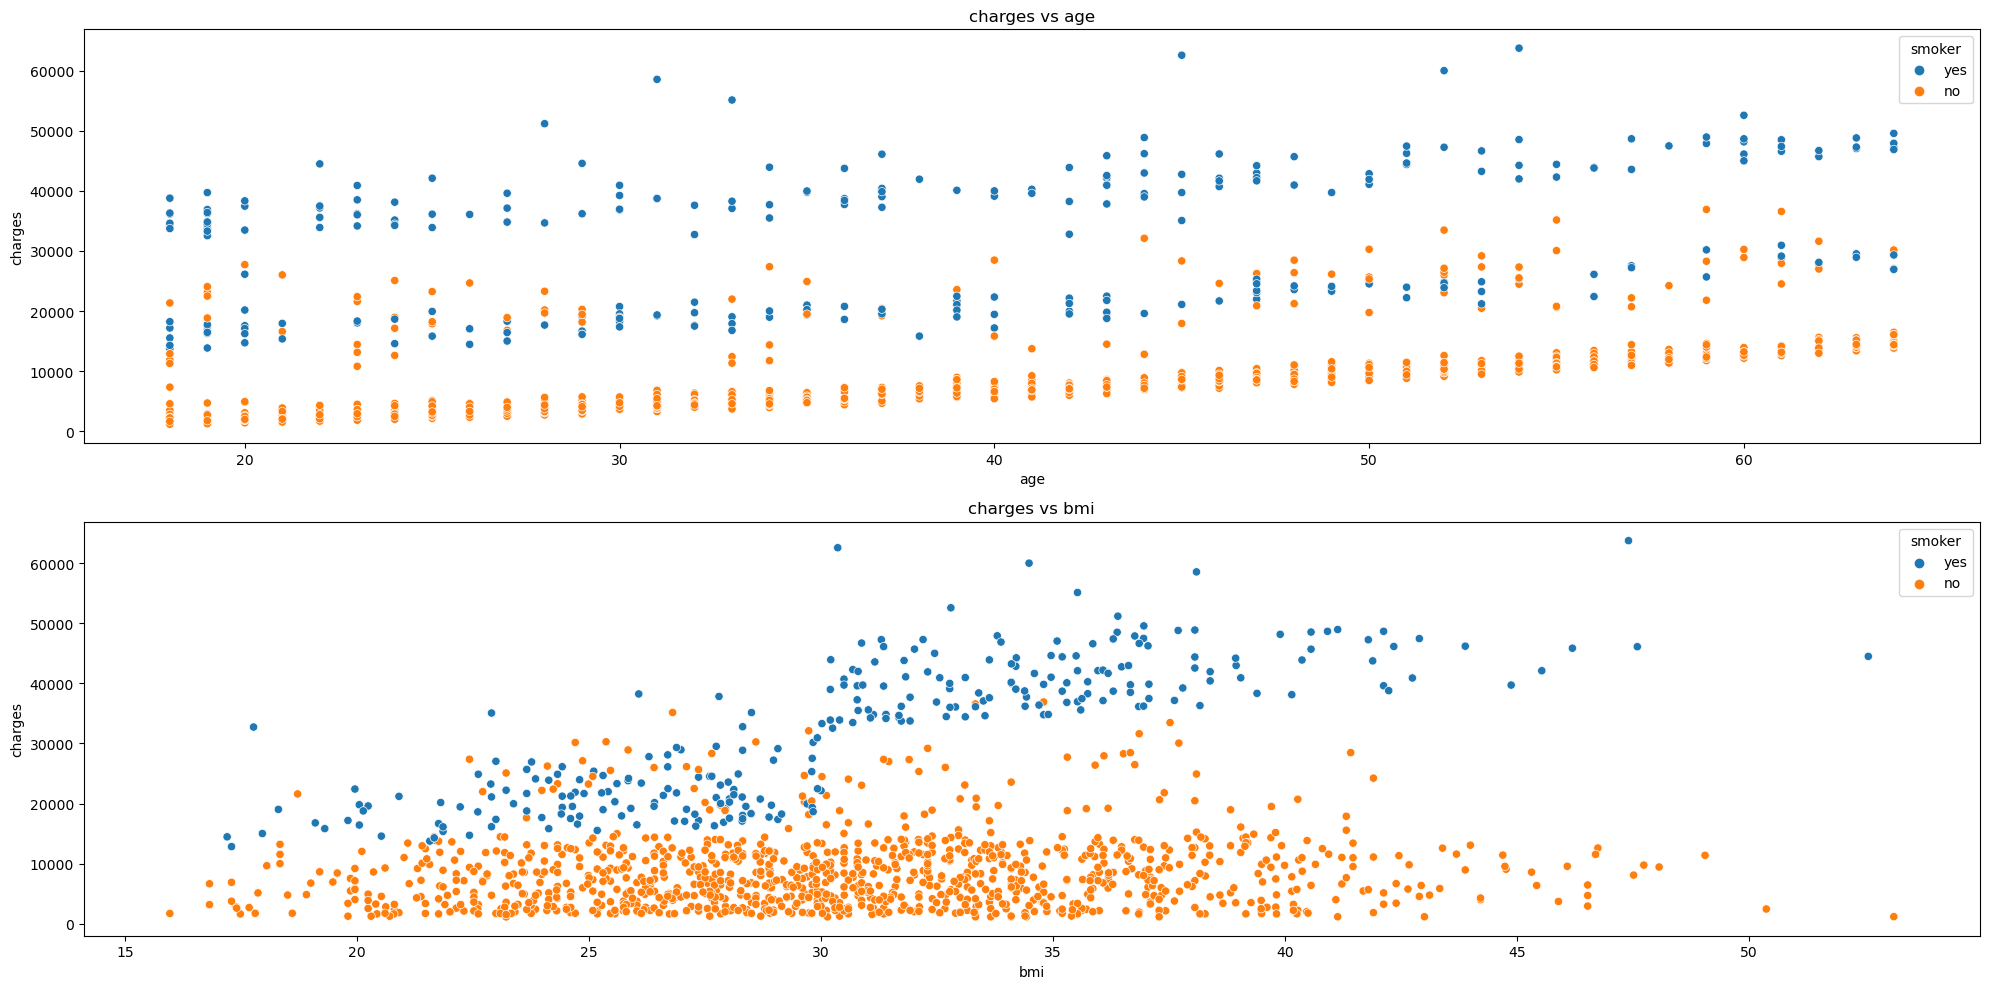

In [13]:
## how smoking effect the charges 
plt.subplots(figsize=(20,10))
for i,col in enumerate(['age','bmi']):
    plt.subplot(2,1,i+1)
    sns.scatterplot(data=df,
                   x=col,y='charges',
                   hue='smoker')
    plt.title('charges vs '+col)
    plt.tight_layout()
plt.show()

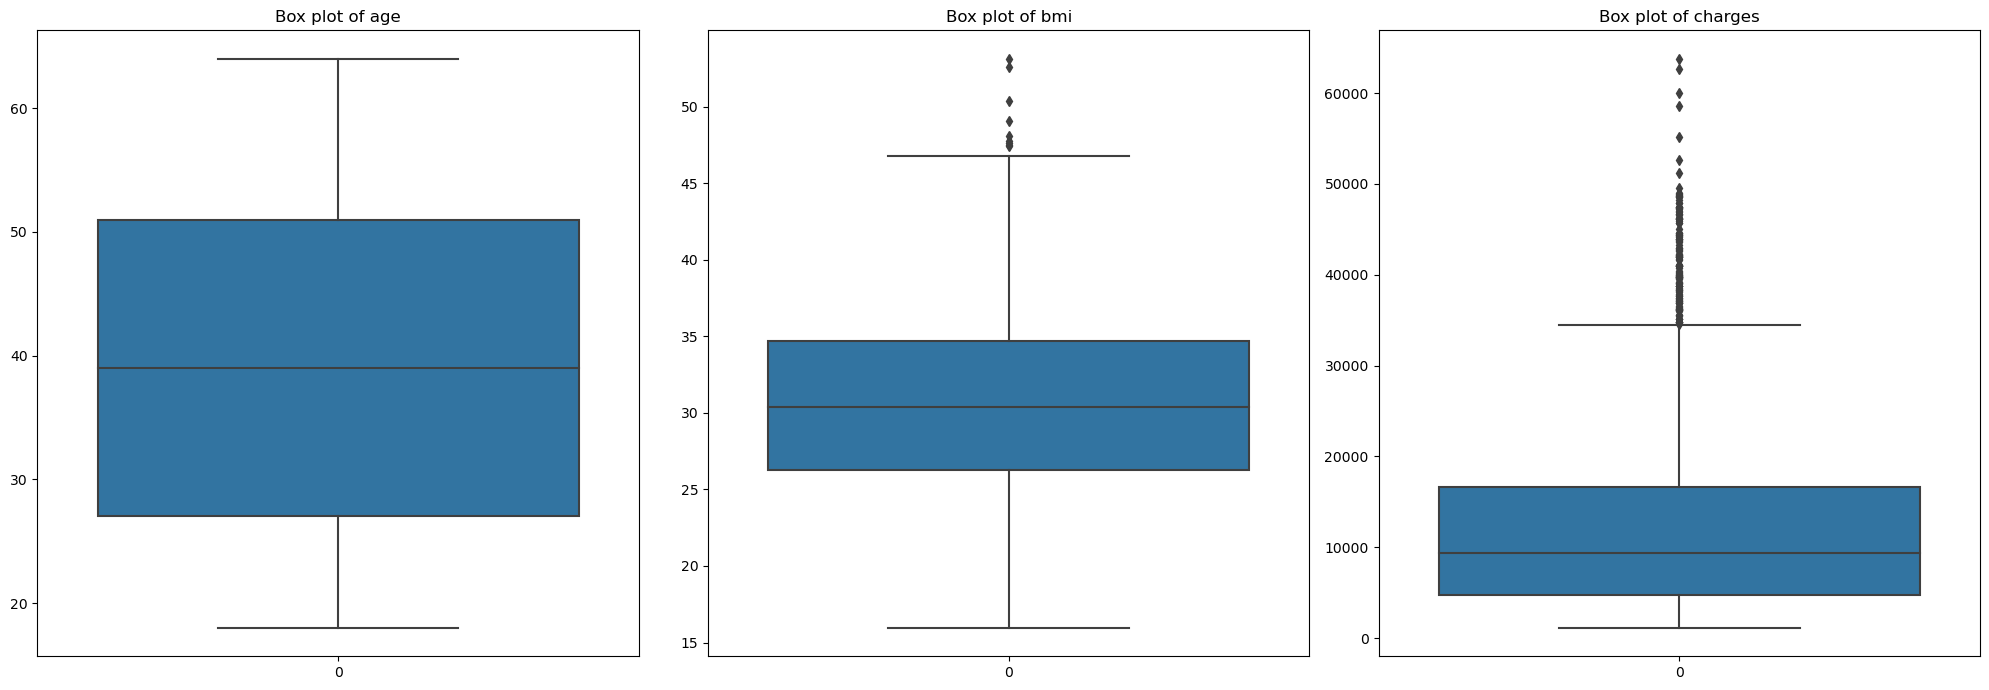

In [14]:
plt.subplots(figsize=(20,7))
for i,col in enumerate(['age','bmi','charges']):
    plt.subplot(1,3,i+1)
    sns.boxplot(df[col],)
    plt.title('Box plot of '+col)
    plt.tight_layout()
plt.show()

In [15]:
from scipy.stats.mstats import winsorize #winsorize replace the outler by the prev or next value of the outlier
df['bmi'] = winsorize(df['bmi'], limits=[0.05, 0.05])

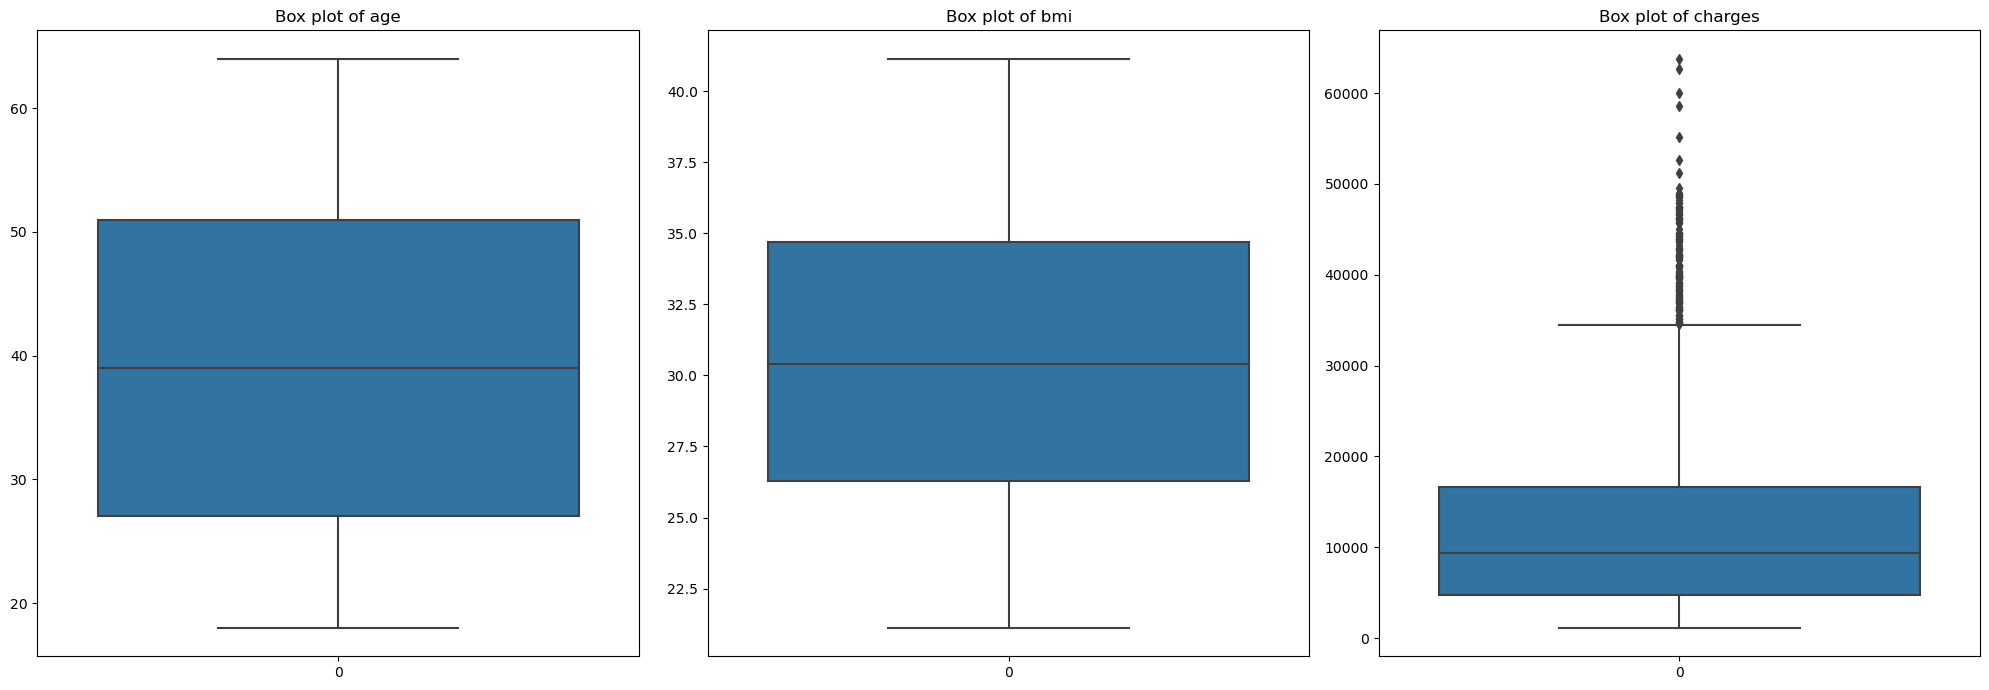

In [16]:
plt.subplots(figsize=(20,7))
for i,col in enumerate(['age','bmi','charges']):
    plt.subplot(1,3,i+1)
    sns.boxplot(df[col],)
    plt.title('Box plot of '+col)
    plt.tight_layout()
plt.show()

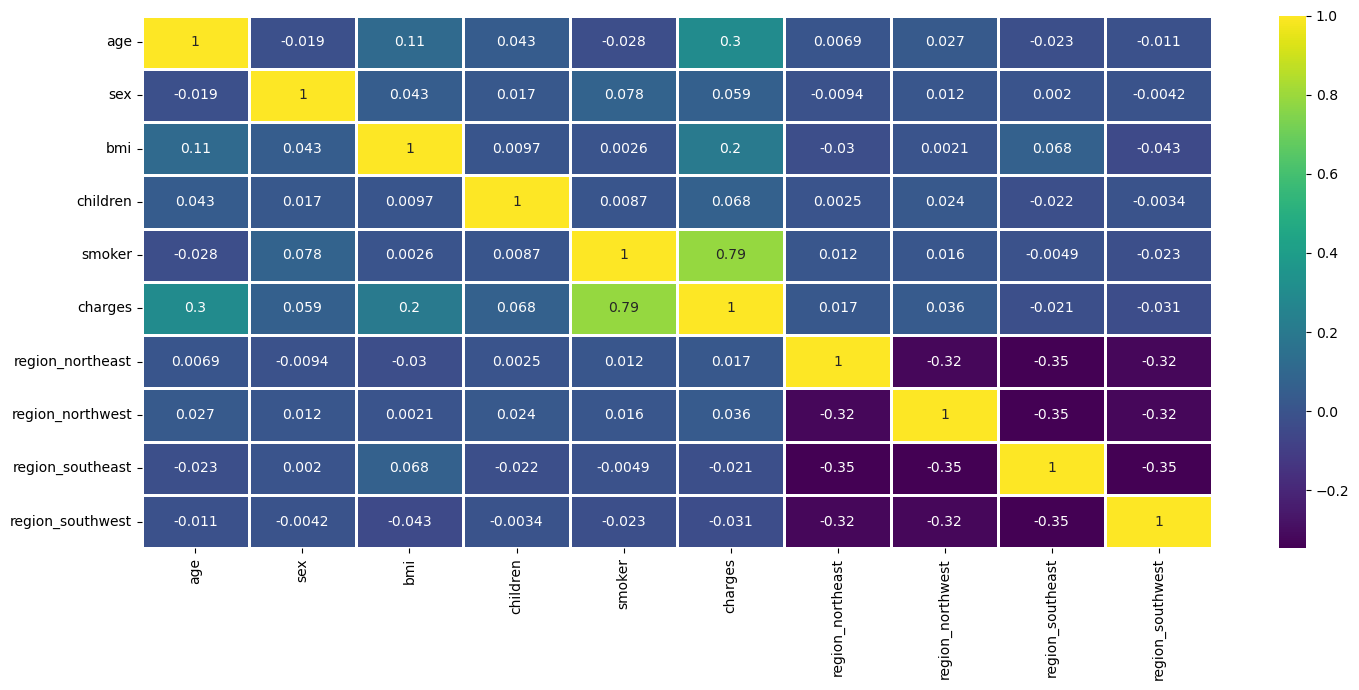

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(dataset.corr(),linecolor='white',linewidths=1,cmap='viridis',annot=True)
plt.tight_layout()

In [17]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoded=encoder.fit_transform(df[['region']]).toarray()
print(encoded)

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [19]:
encoder_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
encoder_df

,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1332,0.0,1.0,0.0,0.0
1333,1.0,0.0,0.0,0.0
1334,0.0,0.0,1.0,0.0
1335,0.0,0.0,0.0,1.0


In [20]:
dataset=pd.concat([df,encoder_df],axis=1)
dataset

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,female,27.900,0.0,yes,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18.0,male,33.770,1.0,no,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28.0,male,33.000,3.0,no,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33.0,male,22.705,0.0,no,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32.0,male,28.880,0.0,no,northwest,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1334,18.0,female,31.920,0.0,no,northeast,2205.98080,0.0,0.0,1.0,0.0
1335,18.0,female,36.850,0.0,no,southeast,1629.83350,0.0,0.0,0.0,1.0
1336,21.0,female,25.800,0.0,no,southwest,2007.94500,0.0,1.0,0.0,0.0
1337,61.0,female,29.070,0.0,yes,northwest,29141.36030,NaN,NaN,NaN,NaN


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 581
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   float64
 1   sex               1337 non-null   object 
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   float64
 4   smoker            1337 non-null   object 
 5   region            1337 non-null   object 
 6   charges           1337 non-null   float64
 7   region_northeast  1337 non-null   float64
 8   region_northwest  1337 non-null   float64
 9   region_southeast  1337 non-null   float64
 10  region_southwest  1337 non-null   float64
dtypes: float64(8), object(3)
memory usage: 125.4+ KB


In [22]:
dataset.dropna(inplace=True)

In [23]:
dataset['sex']=dataset['sex'].map({'male':1,'female':0})
dataset['smoker']=dataset['smoker'].map({'yes':1,'no':0})
dataset.drop(columns=['region'],inplace=True)
dataset

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,0,27.900,0.0,1,16884.92400,0.0,0.0,0.0,1.0
1,18.0,1,33.770,1.0,0,1725.55230,0.0,0.0,1.0,0.0
2,28.0,1,33.000,3.0,0,4449.46200,0.0,0.0,1.0,0.0
3,33.0,1,22.705,0.0,0,21984.47061,0.0,1.0,0.0,0.0
4,32.0,1,28.880,0.0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1332,52.0,0,41.140,3.0,0,11411.68500,0.0,1.0,0.0,0.0
1333,50.0,1,30.970,3.0,0,10600.54830,1.0,0.0,0.0,0.0
1334,18.0,0,31.920,0.0,0,2205.98080,0.0,0.0,1.0,0.0
1335,18.0,0,36.850,0.0,0,1629.83350,0.0,0.0,0.0,1.0


In [24]:
dataset['smoker'].value_counts()

0    1063
1     273
Name: smoker, dtype: int64

In [25]:
dataset

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,0,27.900,0.0,1,16884.92400,0.0,0.0,0.0,1.0
1,18.0,1,33.770,1.0,0,1725.55230,0.0,0.0,1.0,0.0
2,28.0,1,33.000,3.0,0,4449.46200,0.0,0.0,1.0,0.0
3,33.0,1,22.705,0.0,0,21984.47061,0.0,1.0,0.0,0.0
4,32.0,1,28.880,0.0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1332,52.0,0,41.140,3.0,0,11411.68500,0.0,1.0,0.0,0.0
1333,50.0,1,30.970,3.0,0,10600.54830,1.0,0.0,0.0,0.0
1334,18.0,0,31.920,0.0,0,2205.98080,0.0,0.0,1.0,0.0
1335,18.0,0,36.850,0.0,0,1629.83350,0.0,0.0,0.0,1.0


In [26]:
X=dataset.drop(columns=['charges'])
y=dataset['charges']
print(X)
print(y)

       age  sex     bmi  children  smoker  region_northeast  region_northwest  \
0     19.0    0  27.900       0.0       1               0.0               0.0   
1     18.0    1  33.770       1.0       0               0.0               0.0   
2     28.0    1  33.000       3.0       0               0.0               0.0   
3     33.0    1  22.705       0.0       0               0.0               1.0   
4     32.0    1  28.880       0.0       0               0.0               1.0   
...    ...  ...     ...       ...     ...               ...               ...   
1332  52.0    0  41.140       3.0       0               0.0               1.0   
1333  50.0    1  30.970       3.0       0               1.0               0.0   
1334  18.0    0  31.920       0.0       0               0.0               0.0   
1335  18.0    0  36.850       0.0       0               0.0               0.0   
1336  21.0    0  25.800       0.0       0               0.0               1.0   

      region_southeast  reg

## Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split,cross_val_score

In [29]:
c1=[]
c2=[]
c3=[]
cv=0

In [30]:
for i in range(40,50):
    train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=.2,random_state=i)
    lr_model=LinearRegression()
    lr_model.fit(train_x,train_y)
    c1.append(lr_model.score(train_x,train_y))
    c2.append(lr_model.score(test_x,test_y))
    cv=cross_val_score(lr_model,X,y,cv=5).mean()
    c3.append(cv)   

In [31]:
lrscore=pd.DataFrame({'Train Score':c1,'Test Score':c2,'Crossvalidation Score':c3}) 
lrscore ## we can observes that random state=42 give us the better score 

,Train Score,Test Score,Crossvalidation Score
0,0.744465,0.774683,0.747063
1,0.761124,0.684674,0.747063
2,0.726717,0.817481,0.747063
3,0.756984,0.725812,0.747063
4,0.747897,0.761166,0.747063
5,0.746952,0.766559,0.747063
6,0.748395,0.758463,0.747063
7,0.745997,0.763792,0.747063
8,0.766356,0.681537,0.747063
9,0.755369,0.732389,0.747063


In [32]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=.2,random_state=42)
lr_model=LinearRegression()
lr_model.fit(train_x,train_y)
print('Linear Regression')
print('------------------')
print('R² score of train_set:',lr_model.score(train_x,train_y))
print('R² score of test_set:',lr_model.score(test_x,test_y))
print('R² score of cv_set:',cross_val_score(lr_model,X,y,cv=5).mean())

Linear Regression
------------------
R² score of train_set: 0.7267169104581193
R² score of test_set: 0.8174808919971139
R² score of cv_set: 0.7470629646791594


In [33]:
model=['linear regression']
train_score=[lr_model.score(train_x,train_y)]
test_score=[lr_model.score(test_x,test_y)]
cv_score=[cross_val_score(lr_model,X,y,cv=5).mean()]

## Lasso Regression

In [34]:
l1=[]
l2=[]
l3=[]
cv=0
alpha=[0,.0001,.001,.01,.1,1,10,20,30,50,100,500]
for i in alpha :
    train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=.2,random_state=42)
    lassor_model=Lasso(alpha=i,)
    lassor_model.fit(train_x,train_y)
    l1.append(lassor_model.score(train_x,train_y))
    l2.append(lassor_model.score(test_x,test_y))
    cv=cross_val_score(lassor_model,X,y,cv=5).mean()
    l3.append(cv)   
lasso_score=pd.DataFrame({'Alpha':alpha,'Train Score':l1,'Test Score':l2,'Crossvalidation Score':l3}) 


In [35]:
# lasso_score.drop(lasso_score.index,inplace=True)

In [36]:
lasso_score ## we can observes that random state=42 give us the better score 

,Alpha,Train Score,Test Score,Crossvalidation Score
0,0.0000,0.726717,0.817481,0.747063
1,0.0001,0.726717,0.817481,0.747063
2,0.0010,0.726717,0.817481,0.747063
3,0.0100,0.726717,0.817481,0.747063
4,0.1000,0.726717,0.817476,0.747064
5,1.0000,0.726717,0.817435,0.747071
6,10.0000,0.726697,0.817002,0.747123
7,20.0000,0.726636,0.816487,0.747188
8,30.0000,0.726563,0.816014,0.747257
9,50.0000,0.726349,0.815026,0.747289


In [37]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=.2,random_state=42)
lassor_model=Lasso(alpha=50)
lassor_model.fit(train_x,train_y)
print('Lasso Regression')
print('-----------------')
print('R² score of train_set:',lassor_model.score(train_x,train_y))
print('R² score of test_set:',lassor_model.score(test_x,test_y))
print('R² score of cv_set:',cross_val_score(lassor_model,X,y,cv=5).mean())

Lasso Regression
-----------------
R² score of train_set: 0.7263494300944219
R² score of test_set: 0.8150257066522375
R² score of cv_set: 0.7472888439539319


In [38]:
model.append('lasso regression')
train_score.append(lassor_model.score(train_x,train_y))
test_score.append(lassor_model.score(test_x,test_y))
cv_score.append(cross_val_score(lassor_model,X,y,cv=5).mean())

## Support Vector Machine Regression

In [39]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(train_x,train_y)
ypredtrain1=svrmodel.predict(train_x)
ypredtest1=svrmodel.predict(test_x)

In [40]:
print('SVM Regression')
print('---------------')
print('R2 score of train_set',r2_score(train_y,ypredtrain1))
print('R2 score of test_set',r2_score(test_y,ypredtest1))
print('R2 score of cv_set',cross_val_score(svrmodel,X,y,cv=5,).mean())

SVM Regression
---------------
R2 score of train_set -0.09298652602663315
R2 score of test_set -0.1777778174332738
R2 score of cv_set -0.1037335878682697


In [41]:
model.append('SVM Regression')
train_score.append(r2_score(train_y,ypredtrain1))
test_score.append(r2_score(test_y,ypredtest1))
cv_score.append(cross_val_score(svrmodel,X,y,cv=5,).mean())

## Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [43]:
estimator=RandomForestRegressor(random_state=42)
## Hyperparameting the RF
param_grid={'n_estimators':[10,40,50,90,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(train_x,train_y)
print(grid.best_params_)

{'n_estimators': 100}


In [44]:
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(train_x,train_y)
rfytrain_pre=rf_model.predict(train_x)
rfytest_pre=rf_model.predict(test_x)

In [45]:
print('Random Forest Regressor')
print('-----------------------')
print('R2 score of a train_set',r2_score(train_y,rfytrain_pre))
print('R2 score of a test_set',r2_score(test_y,rfytest_pre))
print('R2 score of a cv_set',cross_val_score(rf_model,X,y,cv=5).mean())

Random Forest Regressor
-----------------------
R2 score of a train_set 0.9743083602217009
R2 score of a test_set 0.8800306036643759
R2 score of a cv_set 0.8357991235026321


In [46]:
model.append('Random Forest Regression')
train_score.append(r2_score(train_y,rfytrain_pre))
test_score.append(r2_score(test_y,rfytest_pre))
cv_score.append(cross_val_score(rf_model,X,y,cv=5,).mean())

## Gradient Boosting Regressor

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [48]:
estimator=GradientBoostingRegressor(random_state=42)
param_grid={
    'n_estimators':[10,15,20,25,30,40,50,60],
    'learning_rate':[.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
}
grid=GridSearchCV(estimator,param_grid,scoring='r2',cv=5)
grid.fit(train_x,train_y)
print(grid.best_params_)

{'learning_rate': 0.1, 'n_estimators': 40}


In [49]:
gbmodel=GradientBoostingRegressor(learning_rate=0.1,n_estimators=40,random_state=42)
gbmodel.fit(train_x,train_y)
gbytrain_pre=gbmodel.predict(train_x)
gbytest_pre=gbmodel.predict(test_x)

In [50]:
print('Gradient Boosting Regressor')
print('-----------------------')
print('R2 score of a train_set',r2_score(train_y,gbytrain_pre))
print('R2 score of a test_set',r2_score(test_y,gbytest_pre))
print('R2 score of a cv_set',cross_val_score(gbmodel,X,y,cv=5).mean())

Gradient Boosting Regressor
-----------------------
R2 score of a train_set 0.8687303298638188
R2 score of a test_set 0.9026607161578452
R2 score of a cv_set 0.8596811054470084


In [51]:
model.append('Gradien Boosting Regression')
train_score.append(r2_score(train_y,gbytrain_pre))
test_score.append(r2_score(test_y,gbytest_pre))
cv_score.append(cross_val_score(gbmodel,X,y,cv=5,).mean())

## XGB Regressor

In [52]:
from xgboost import XGBRegressor

In [53]:
estimator=XGBRegressor()

param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(train_x,train_y)
print(grid.best_params_)


{'gamma': 0, 'max_depth': 4, 'n_estimators': 10}


In [54]:
xgbmodel=XGBRegressor(n_estimators=10,max_depth=4,gamma=0)
xgbmodel.fit(train_x,train_y)
xgytrain_pre=xgbmodel.predict(train_x)
xgytest_pre=xgbmodel.predict(test_x)

In [55]:
print('XGBoost Regressor')
print('-----------------------')
print('R2 score of a train_set',r2_score(train_y,xgytrain_pre))
print('R2 score of a test_set',r2_score(test_y,xgytest_pre))
print('R2 score of a cv_set',cross_val_score(xgbmodel,X,y,cv=5).mean())

XGBoost Regressor
-----------------------
R2 score of a train_set 0.8736786927479351
R2 score of a test_set 0.9057439006603506
R2 score of a cv_set 0.8595807943548927


In [56]:
model.append('XGBoost Regression')
train_score.append(r2_score(train_y,xgytrain_pre))
test_score.append(r2_score(test_y,xgytest_pre))
cv_score.append(cross_val_score(xgbmodel,X,y,cv=5,).mean())

In [57]:
Model_scores=pd.DataFrame({
    'Model':model,
    'Train score':train_score,
    'Test Score': test_score,
    'CV Score':cv_score
})

In [58]:
Model_scores

,Model,Train score,Test Score,CV Score
0,linear regression,0.726717,0.817481,0.747063
1,lasso regression,0.726349,0.815026,0.747289
2,SVM Regression,-0.092987,-0.177778,-0.103734
3,Random Forest Regression,0.974308,0.880031,0.835799
4,Gradien Boosting Regression,0.868730,0.902661,0.859681
5,XGBoost Regression,0.873679,0.905744,0.859581


#### XGBoost perform well amoung the other models 

In [59]:
## now we find out the important feature from our dataset and build a final model useing xgboost

In [60]:
features=pd.DataFrame(grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
features

,Importance
age,0.027895
sex,0.003042
bmi,0.049973
children,0.008184
smoker,0.900685
region_northeast,0.002060
region_northwest,0.000000
region_southeast,0.003504
region_southwest,0.004657


In [65]:
imp_features=features[features['Importance']>.005]
imp_features

,Importance
age,0.027895
bmi,0.049973
children,0.008184
smoker,0.900685


In [69]:
# df.drop(df[['sex','region']],axis=1,inplace=True)
Xf=dataset[['age','bmi','children','smoker']]
# X=df.drop(df[['charges']],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xf,y,test_size=0.2,random_state=42)
finalmodel=XGBRegressor(n_estimators=10,max_depth=4,gamma=0)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(finalmodel,X,y,cv=5,).mean())


0.8729513116465377
0.9046353470456456
0.8595807943548927


In [70]:
from pickle import dump
dump(finalmodel,open('insurancemodelf.pkl','wb'))


In [71]:
new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)


array([17665.135], dtype=float32)